TEST: [0]
14167.512808882675
0.6932219014321268


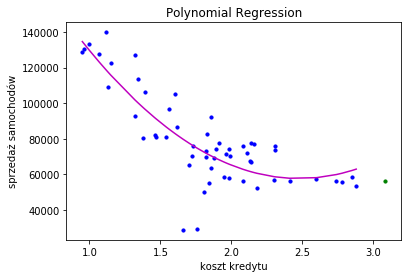

TEST: [1]
14211.809882061409
0.6901624352439104


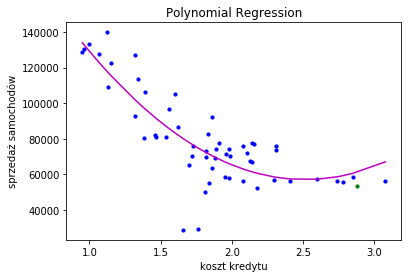

TEST: [2]
14238.434097789324
0.6899608747919359


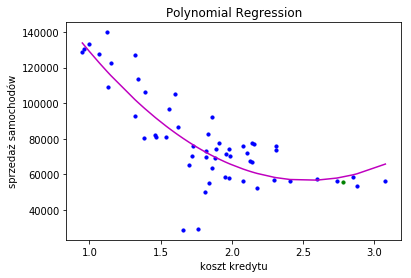

TEST: [3]
14240.303530627458
0.6899364809440851


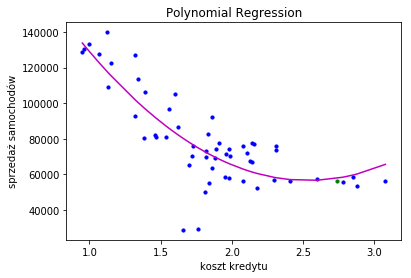

TEST: [4]
14241.364866830514
0.6907633905082702


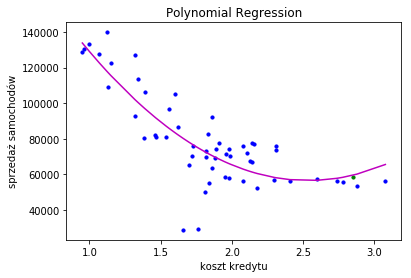

TEST: [5]
14241.620039111269
0.6903189923265548


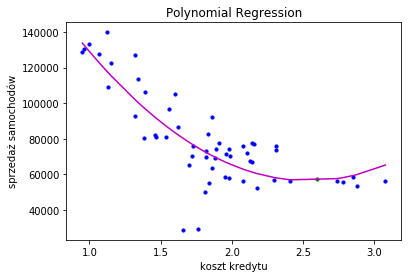

TEST: [6]
14241.78435297055
0.6899958065251507


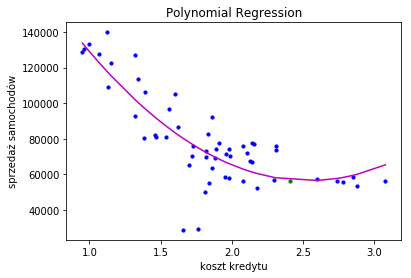

TEST: [7]
14241.018928049505
0.6902523064934815


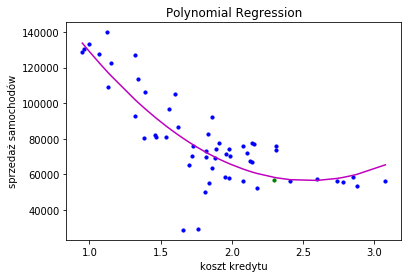

TEST: [8]
14078.962429977613
0.7009999787954269


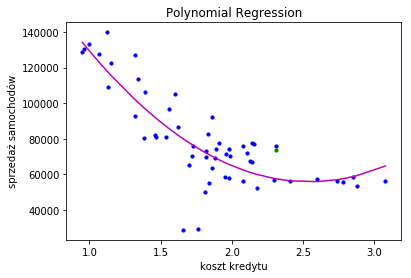

TEST: [9]
14228.873964957591
0.6941968043466458


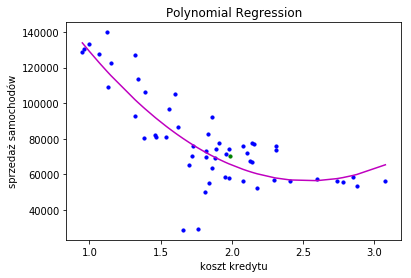

TEST: [10]
14241.49393286612
0.6940095302214209


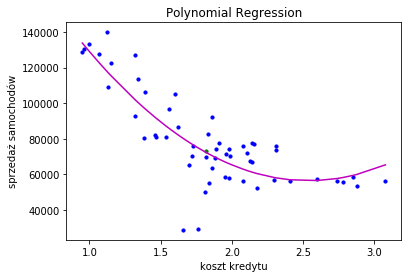

TEST: [11]
14241.465224690133
0.694187710850795


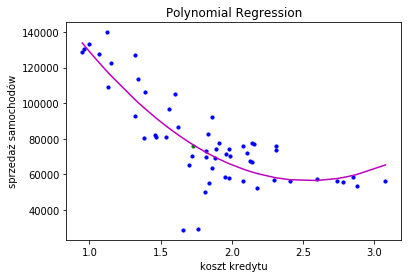

TEST: [12]
14138.120003795651
0.6972327409469408


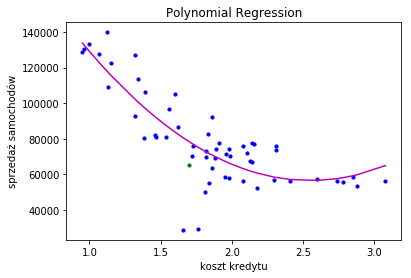

TEST: [13]
14178.826521280916
0.6968235058452521


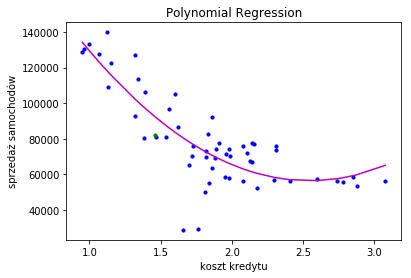

TEST: [14]
14050.351259068802
0.7023755129295428


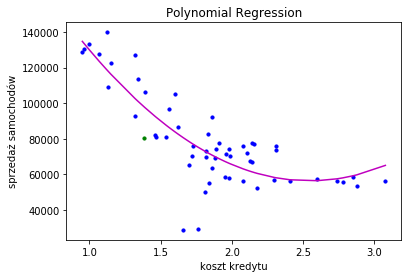

TEST: [15]
14169.633660680875
0.6972872541775921


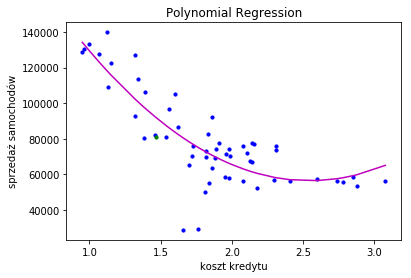

TEST: [16]
12795.63959899954
0.7352634784792381


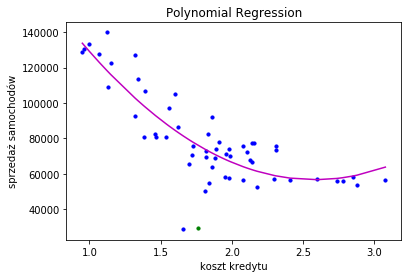

TEST: [17]
12388.313131171048
0.7514127288959166


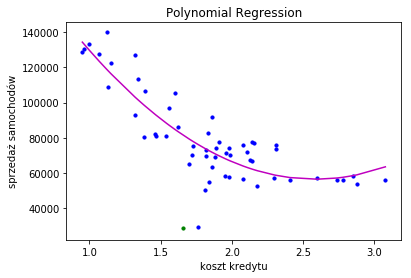

TEST: [18]
14214.29361264934
0.6948754393273194


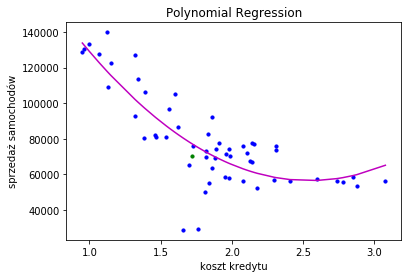

TEST: [19]
14226.26537074709
0.6947546219749385


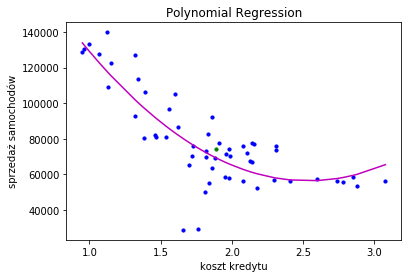

TEST: [20]
14214.816323810766
0.691201983386433


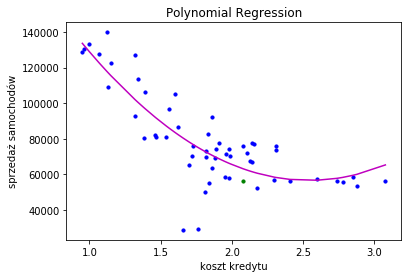

TEST: [21]
14060.558520996805
0.6972319798839057


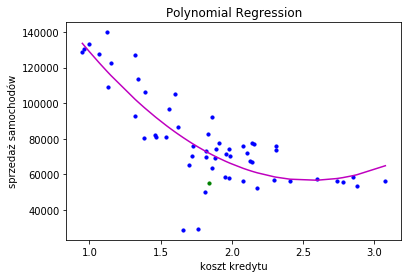

TEST: [22]
13906.455071850067
0.7018132147792147


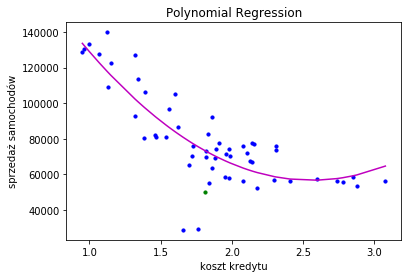

TEST: [23]
14192.958168226163
0.6928749318622555


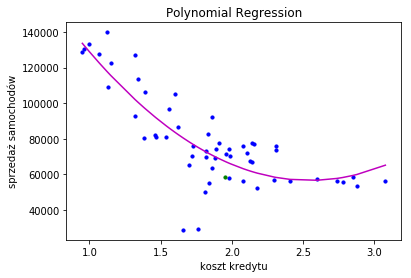

TEST: [24]
14217.95575557921
0.6942444983125962


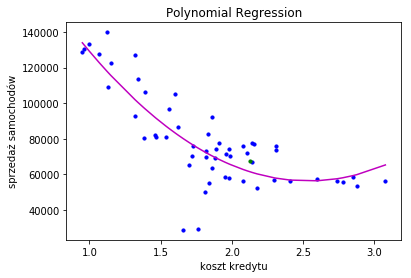

TEST: [25]
14241.768378119985
0.693498971946445


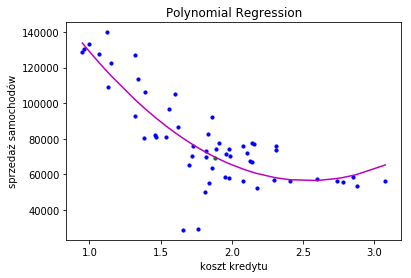

TEST: [26]
14210.044336836296
0.6936985278921455


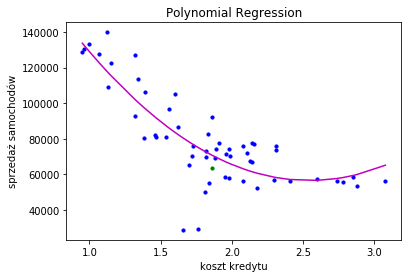

TEST: [27]
14198.590818859302
0.6959330527578271


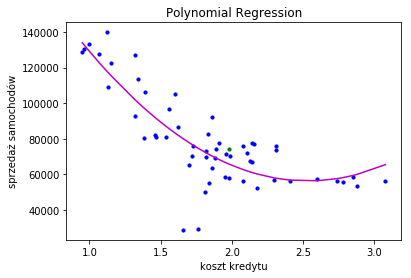

TEST: [28]
14066.921188197311
0.7017010502186012


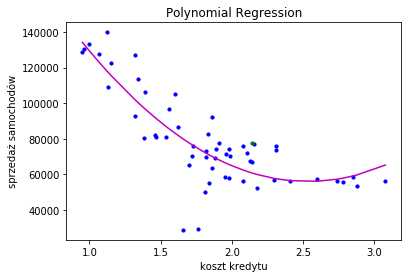

TEST: [29]
14228.620833473842
0.6943533301953447


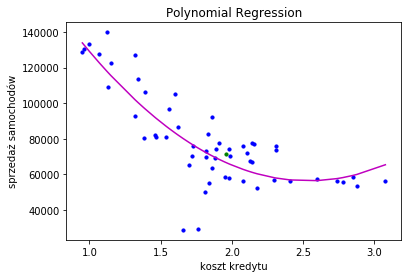

TEST: [30]
14196.198302070068
0.6924622083536254


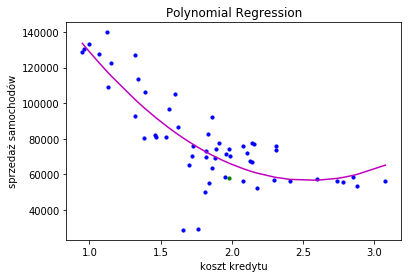

TEST: [31]
14222.926654469875
0.6938527752573984


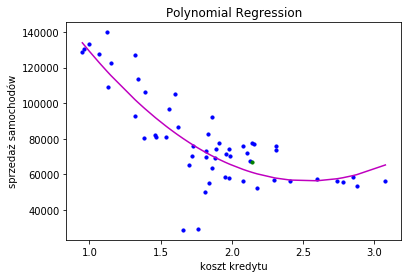

TEST: [32]
14029.265701329628
0.7032453243166374


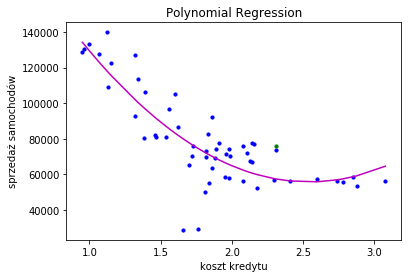

TEST: [33]
14176.022200585649
0.6967083589615365


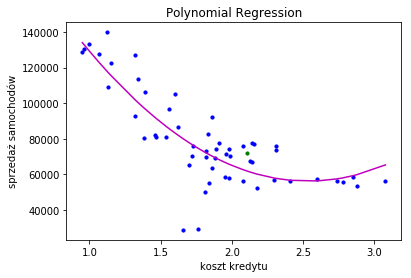

TEST: [34]
14131.850966061305
0.6988854798720363


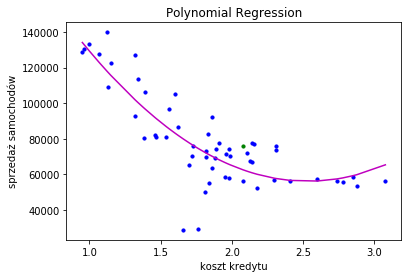

TEST: [35]
14065.194368269482
0.7017663153283811


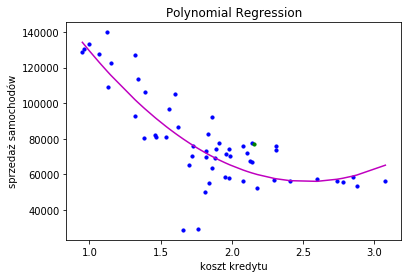

TEST: [36]
14201.070179713837
0.6901254847497753


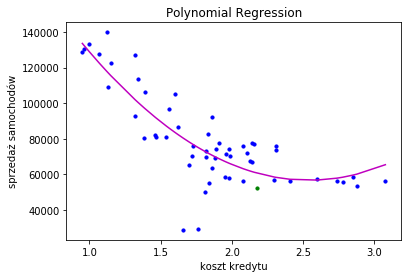

TEST: [37]
14186.10425437751
0.6966281791001594


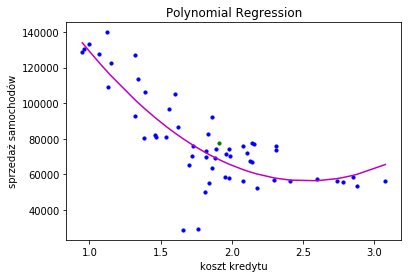

TEST: [38]
14236.897668260408
0.6937577715772701


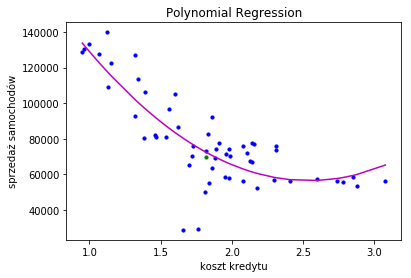

TEST: [39]
14167.305505829854
0.6973051578113469


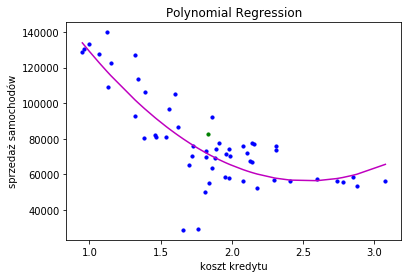

TEST: [40]
13934.529445593924
0.7057928700939959


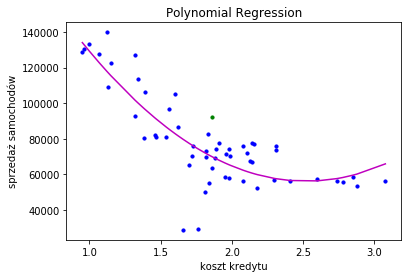

TEST: [41]
14231.135318302082
0.694179426778011


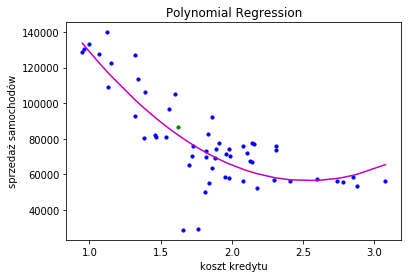

TEST: [42]
14216.563000429918
0.6952858849907697


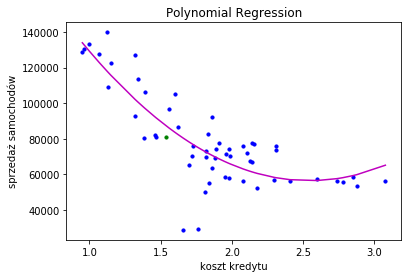

TEST: [43]
14160.155675568372
0.6948524744836504


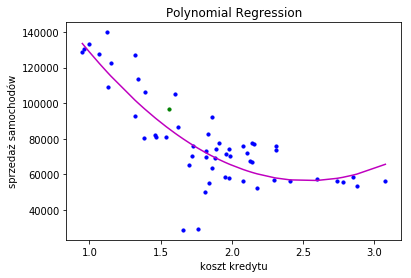

TEST: [44]
13928.464865021146
0.7016316794878348


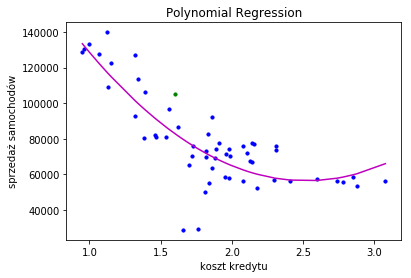

TEST: [45]
14181.390400441136
0.6900952179162922


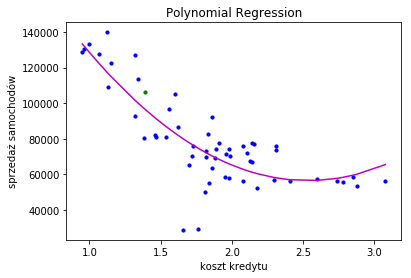

TEST: [46]
14186.247132434706
0.6948909161938155


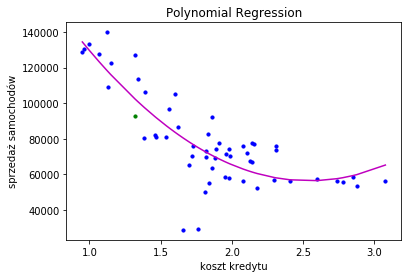

TEST: [47]
14129.87466999747
0.6884335244695909


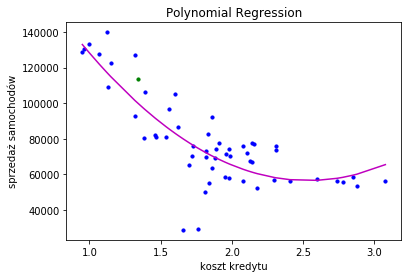

TEST: [48]
13816.498310118717
0.6919935174689718


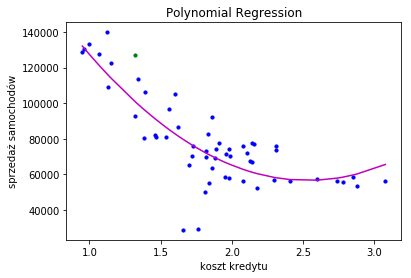

TEST: [49]
14207.633423193322
0.6782847421698182


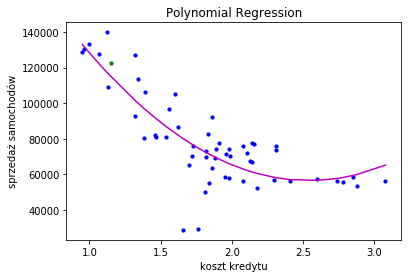

TEST: [50]
14194.352754549287
0.688222216941373


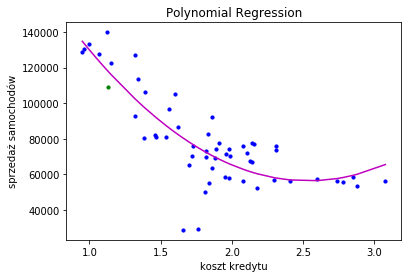

TEST: [51]
14223.99428438647
0.6730732746054329


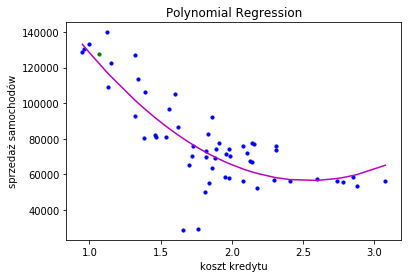

TEST: [52]
13909.5758161207
0.6741595477592641


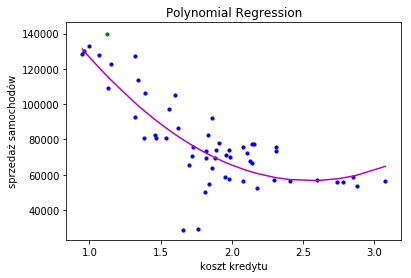

TEST: [53]
14229.378258693283
0.6670942801723365


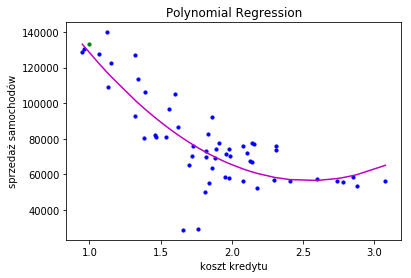

TEST: [54]
14237.123719754081
0.6697900448675915


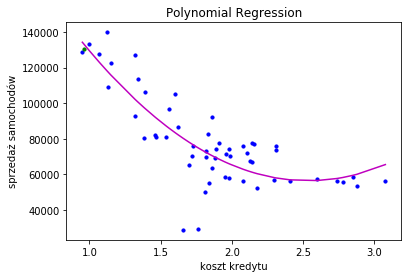

TEST: [55]
14221.001786408342
0.6722984667841341


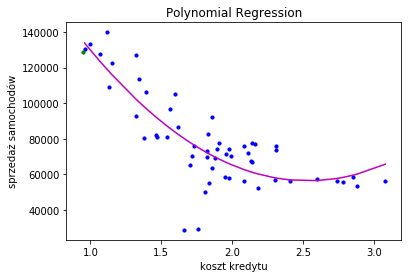

In [2]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut
X = np.array([[3.08],[2.88],[2.78],[2.74],[2.85],[2.60],[2.41],[2.30],[2.31],[1.99],[1.82],[1.73],[1.70],[1.46],[1.38],[1.47],[1.76],
     [1.66],[1.72],[1.89],[2.08],[1.84],[1.81],[1.95],[2.13],[1.88],[1.86],[1.98],[2.14],[1.96],[1.98],[2.14],[2.31],[2.11],
     [2.08],[2.16],[2.18],[1.91],[1.82],[1.83],[1.86],[1.62],[1.54],[1.56],[1.60],[1.39],[1.32],[1.34],[1.32],[1.15],[1.13],
     [1.07], [1.12], [1.00], [0.96], [0.95]])
y = np.array([56405,53648,55942,56086,58426,57231,56402,56984,73694,70154,73158,75642,65473,82351,80654,
   81004,29313,28720,70526,74256,56488,54867,50274,58463,67610,69213,63622,74148,77577,71236,
   57697,66701,75906,72085,75816,77176,52522,77795,69525,82517,92108,86412,80826,96991,105236,
   106486,92850,113486,127098,122628,109003,127606,139885,133160,130298,128546])
loo = LeaveOneOut()
loo.get_n_splits(X)

for train_index, test_index in loo.split(X):
    print("TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    polynomial_features= PolynomialFeatures(degree=2)
    X_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_poly, y_train)
    y_poly_pred = model.predict(X_poly)

    rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
    r2 = r2_score(y_train,y_poly_pred)
    print(rmse)
    print(r2)
    plt.scatter(X_train, y_train, s=10,color='b')
    plt.scatter(X_test, y_test, s=10,color='g')
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_train,y_poly_pred), key=sort_axis)
    X_train, y_poly_pred = zip(*sorted_zip)
    plt.plot(X_train, y_poly_pred, color='m')
    plt.title('Polynomial Regression') 
    plt.xlabel('koszt kredytu')
    plt.ylabel('sprzedaż samochodów')
    plt.show()